# Librairy import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb

from math import *
from statistics import *
import random

# Basic Exploration

In [2]:
# Import dataframe
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


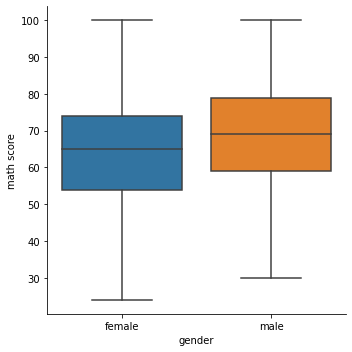

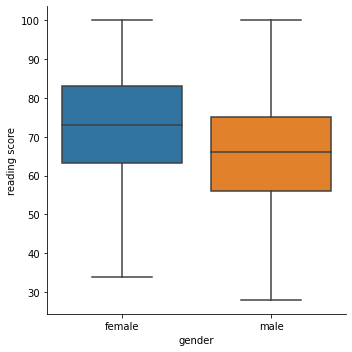

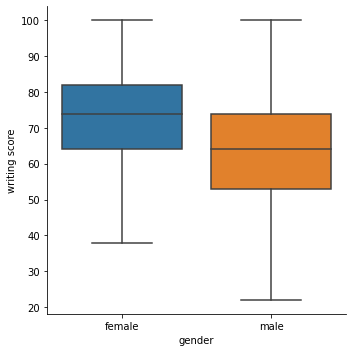

In [6]:
g1 = sns.catplot(x='gender', y='math score', data=df, kind='box', sym='')
g2 = sns.catplot(x='gender', y='reading score', data=df, kind='box', sym='')
g3 = sns.catplot(x='gender', y='writing score', data=df, kind='box', sym='')

It is noticeable that women perform better than men in literary subjects, while men perform better than women in scientific subjects.

Men lose a few points between math and literature but do not lose any points between written expression and written comprehension. Conversely, the same is true for women.

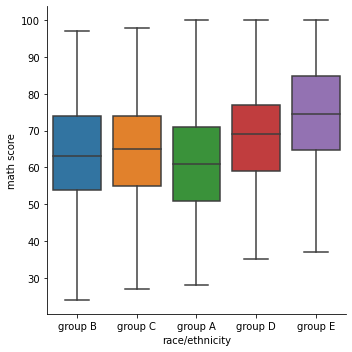

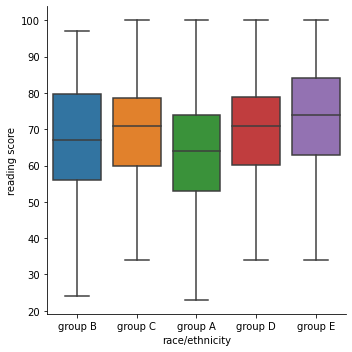

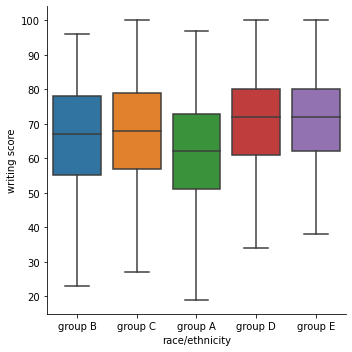

In [7]:
g1 = sns.catplot(x='race/ethnicity', y='math score', data=df, kind='box', sym='')
g2 = sns.catplot(x='race/ethnicity', y='reading score', data=df, kind='box', sym='')
g3 = sns.catplot(x='race/ethnicity', y='writing score', data=df, kind='box', sym='')

In the 3 subjects, there is a slight inferiority of results for group A and a slight superiority of results for group E.

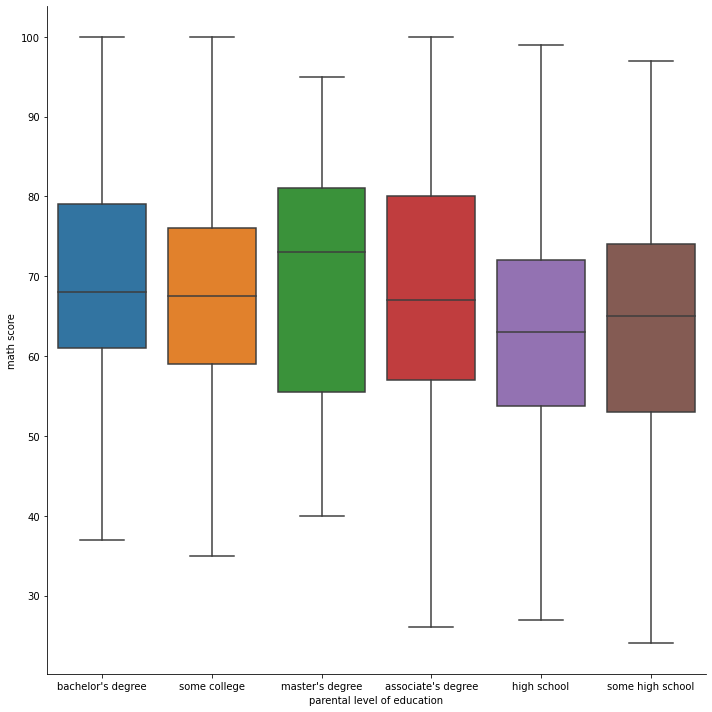

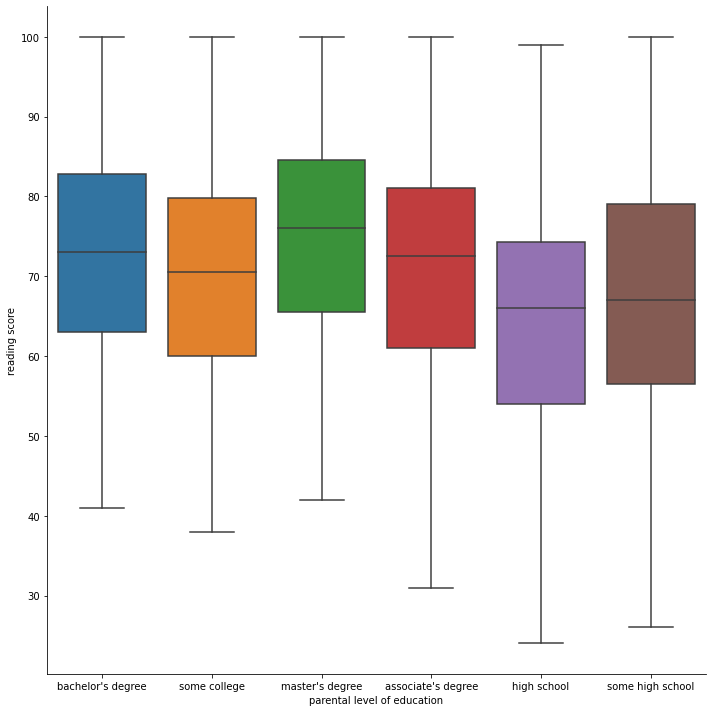

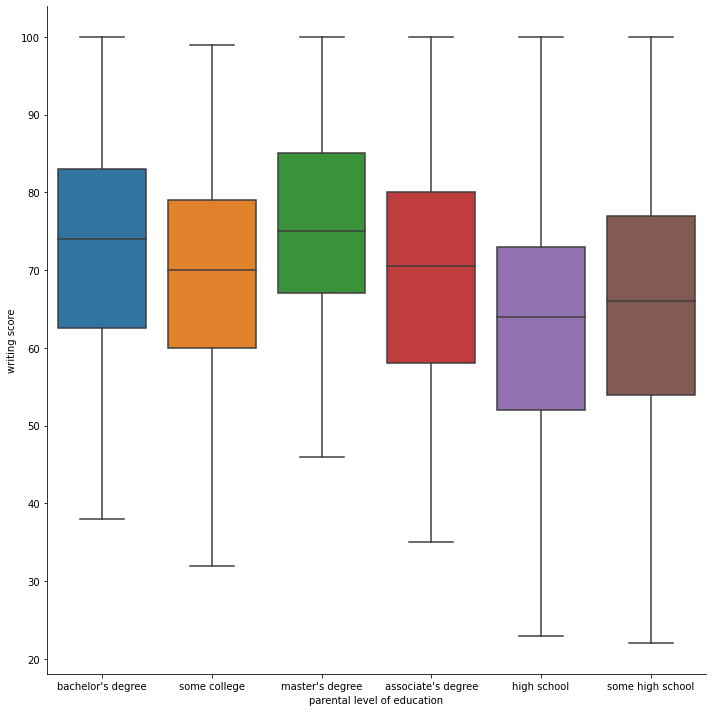

In [8]:
g1 = sns.catplot(x='parental level of education', y='math score', data=df, kind='box', sym='', height=10)
g2 = sns.catplot(x='parental level of education', y='reading score', data=df, kind='box', sym='', height=10)
g3 = sns.catplot(x='parental level of education', y='writing score', data=df, kind='box', sym='', height=10)

The parental level of education does not seem to have a major influence. Only the bachelor's degree and master's degree groups have higher results with a lower dispersion.

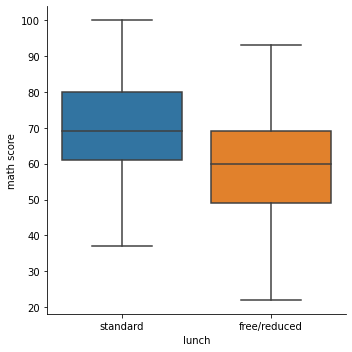

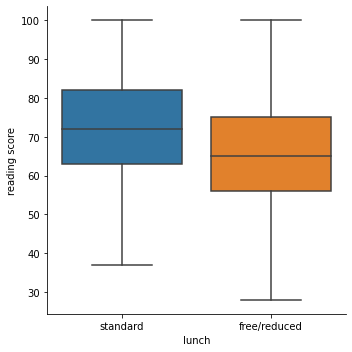

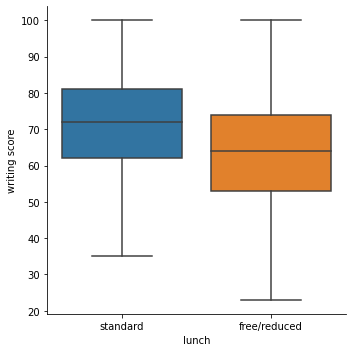

In [9]:
g1 = sns.catplot(x='lunch', y='math score', data=df, kind='box', sym='')
g2 = sns.catplot(x='lunch', y='reading score', data=df, kind='box', sym='')
g3 = sns.catplot(x='lunch', y='writing score', data=df, kind='box', sym='')

For each of the exams, students with a free or reduced boarding system, probably from poor families, perform less well than the others.

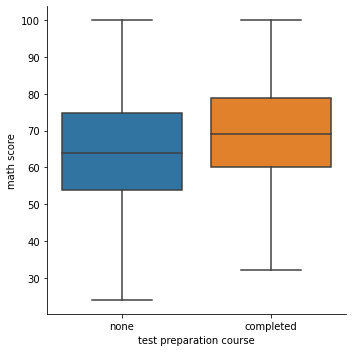

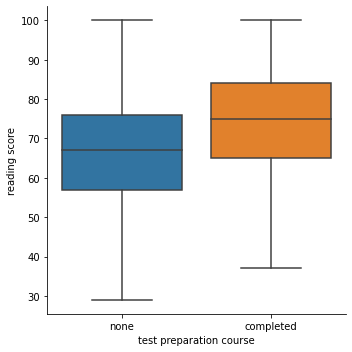

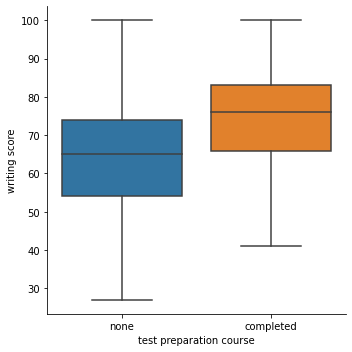

In [10]:
g1 = sns.catplot(x='test preparation course', y='math score', data=df, kind='box', sym='')
g2 = sns.catplot(x='test preparation course', y='reading score', data=df, kind='box', sym='')
g3 = sns.catplot(x='test preparation course', y='writing score', data=df, kind='box', sym='')

Having taken exam preparation courses seems to have a positive influence on the results. It seems that working harder is rewarded!

# Correlation study

In [11]:
# Import dataframe
df = pd.read_csv("StudentsPerformance.csv")

# One Hot encoding
df_sex = pd.get_dummies(df["gender"], prefix="sex")
df_race = pd.get_dummies(df["race/ethnicity"], prefix="race")
df_parent = pd.get_dummies(df["parental level of education"], prefix="parent")
df_lunch = pd.get_dummies(df["lunch"], prefix="lunch")
df_preparation = pd.get_dummies(df["test preparation course"], prefix="preparation")

# New dataframe
df = df.drop(["gender", "race/ethnicity", "parental level of education", "lunch", "test preparation course"], axis=1)
df_cat = pd.concat([df_sex, df_race, df_parent, df_lunch, df_preparation], axis=1)
# df_cat = df_cat.astype("category") # We can put type as category but we will not have correlation
df = pd.concat([df, df_cat], axis=1)
df.head()

,math score,reading score,writing score,sex_female,sex_male,race_group A,race_group B,race_group C,race_group D,race_group E,parent_associate's degree,parent_bachelor's degree,parent_high school,parent_master's degree,parent_some college,parent_some high school,lunch_free/reduced,lunch_standard,preparation_completed,preparation_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


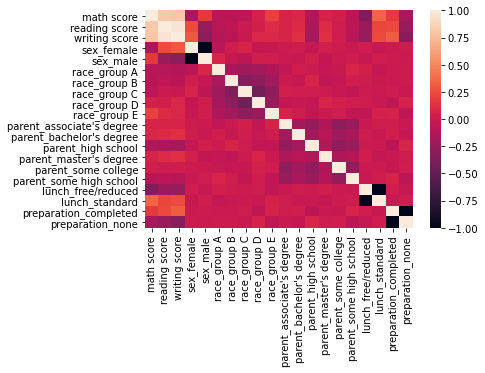

In [16]:
corr = df.corr()

sns.heatmap(corr)

# corr.where(0.5 < abs(corr))

At first glance, we can see that there is a strong correlation between math, reading and writing scores (between 0.80 and 1). This can be explained by the fact that when a student is good in one subject, he is good in all subjects, and conversely when the student is bad. We also note that this correlation is stronger between the literary subjects (reading and writing).

Others correlations are too low to be relevant. 

Nevertheless, the lunch system seems to have a little impact on score (0.35, 0.22 and 0.24). An interpretation could be that wealthier people succeed better.

Moreover, gender seems to have a little impact too on score (-0.16, 0.24, 0.3). We could say that women are better in litterature and worse in math than men.

Those two last facts can be confirmed with the graphs in basic exploration section.

# Model prediction

Training error :  13.565188608157404
Test error :  14.35731386084075


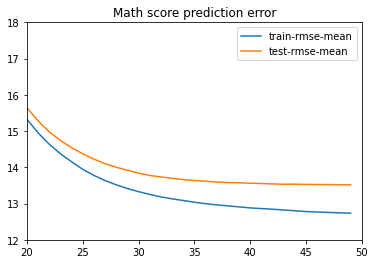

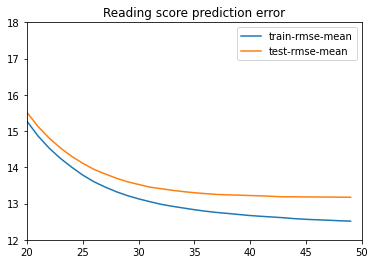

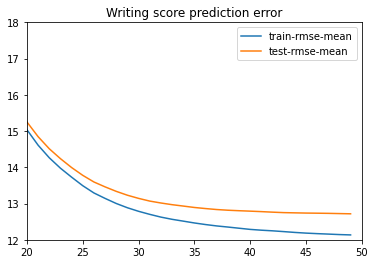

In [13]:
# Creation of X and y
feature_cols_predict = ["math score", "reading score", "writing score"]
X = df.drop(feature_cols_predict, axis=1)
y = df[feature_cols_predict]

# Train Test spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initiating model
multioutputregressor = MultiOutputRegressor(xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                          max_depth = 5, alpha = 10, n_estimators = 27))

# Fitting model
mod = multioutputregressor.fit(X_train,y_train)

# Predictions and their error
preds_train = mod.predict(X_train)
preds_test = mod.predict(X_test)

print("Training error : ", np.sqrt(mean_squared_error(y_train, preds_train)))
print("Test error : ", np.sqrt(mean_squared_error(y_test, preds_test)))

# Parameters optimisation -----------------------------------------------------------------------------------------------------

# Math Score
data_dmatrix = xgb.DMatrix(data=X,label=y["math score"])

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results[["train-rmse-mean", "test-rmse-mean"]].plot(xlim=[20, 50], ylim=[12, 18], title = "Math score prediction error")

# Reading Score
data_dmatrix = xgb.DMatrix(data=X,label=y["reading score"])

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results[["train-rmse-mean", "test-rmse-mean"]].plot(xlim=[20, 50], ylim=[12, 18], title = "Reading score prediction error")

# Writing Score
data_dmatrix = xgb.DMatrix(data=X,label=y["writing score"])

params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results[["train-rmse-mean", "test-rmse-mean"]].plot(xlim=[20, 50], ylim=[12, 18], title = "Writing score prediction error")

# To be optimal we can found the number of estimatiors that minimize error on train and minimize error between test and train.
# We can approximate by graphic reading that this n_estimators is around 30
# We can also replace cv_results with a grid search for a more optimized model

# Feature importance

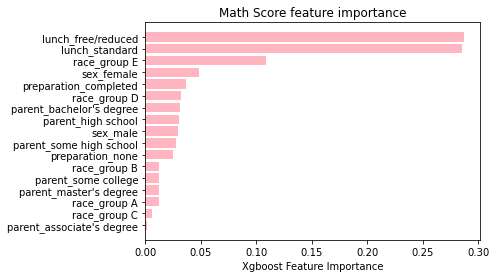

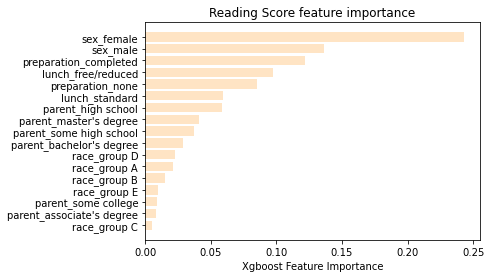

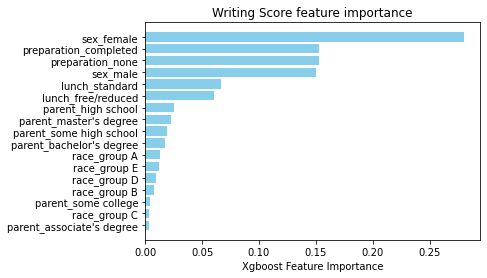

In [14]:
# Feature importance math score
# print(mod.estimators_[0].feature_importances_)
sorted_idx = mod.estimators_[0].feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], mod.estimators_[0].feature_importances_[sorted_idx], color="lightpink")
plt.xlabel("Xgboost Feature Importance")
plt.title("Math Score feature importance")
plt.show()

# Feature importance reading score
# print(mod.estimators_[1].feature_importances_)
sorted_idx = mod.estimators_[1].feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], mod.estimators_[1].feature_importances_[sorted_idx], color="bisque")
plt.xlabel("Xgboost Feature Importance")
plt.title("Reading Score feature importance")
plt.show()

# Feature importance writing score
# print(mod.estimators_[2].feature_importances_)
sorted_idx = mod.estimators_[2].feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], mod.estimators_[2].feature_importances_[sorted_idx], color="skyblue")
plt.xlabel("Xgboost Feature Importance")
plt.title("Writing Score feature importance")
plt.show()

For math scores, the most important variables are level of wealth and Group E membership. 

Coming from a well-to-do background would therefore make it much easier to pass math exams.
Similarly, ethnic group E seems to have a strong attraction or pressure to succeed, particularly in the area of mathematics.

On the contrary, in the other two disciplines, which are literary, ethnicity has a very low impact. The level of wealth is always important but less so compared to gender and exam preparation. 

One possible interpretation would be that women are more gifted than men in literary subjects. This does not seem to contradict the assumptions inferred from correlation and boxplots.

Moreover, exam preparation seems to be crucial for the letters and not for mathematics. This can be explained by the cramming-friendly form of the literary exams but also by the fact that culture and biographical references are not innate or less than in mathematics.

# You’re the best around

In [15]:
Thomas = np.array([[0, 1,  0, 0, 0, 0, 1,  0, 1, 0, 0, 0, 0,  1, 0,  0, 1]])
Arnaud = np.array([[0, 1,  0, 0, 0, 0, 1,  0, 0, 0, 1, 0, 0,  0, 1,  0, 1]])

pred_Thomas = mod.predict(Thomas)
pred_Arnaud = mod.predict(Arnaud)

print("Thomas had a math score of %d on 100" % (pred_Thomas[0][0]))
print("Arnaud had a math score of %d on 100" % (pred_Arnaud[0][0]))
print("%s beats %s in math ! \n"  % ("Arnaud" if pred_Arnaud[0][0] > pred_Thomas[0][0] else "Thomas", "Arnaud" if pred_Arnaud[0][0] < pred_Thomas[0][0] else "Thomas"))

print("Thomas had a reading score of %d on 100" % (pred_Thomas[0][1]))
print("Arnaud had a reading score of %d on 100" % (pred_Arnaud[0][1]))
print("%s beats %s in reading ! \n"  % ("Arnaud" if pred_Arnaud[0][1] > pred_Thomas[0][1] else "Thomas", "Arnaud" if pred_Arnaud[0][1] < pred_Thomas[0][1] else "Thomas"))

print("Thomas had a writing score of %d on 100" % (pred_Thomas[0][2]))
print("Arnaud had a writing score of %d on 100" % (pred_Arnaud[0][2]))
print("%s beats %s in writing ! \n"  % ("Arnaud" if pred_Arnaud[0][2] > pred_Thomas[0][2] else "Thomas", "Arnaud" if pred_Arnaud[0][2] < pred_Thomas[0][2] else "Thomas"))

Thomas had a math score of 61 on 100
Arnaud had a math score of 71 on 100
Arnaud beats Thomas in math ! 

Thomas had a reading score of 58 on 100
Arnaud had a reading score of 67 on 100
Arnaud beats Thomas in reading ! 

Thomas had a writing score of 56 on 100
Arnaud had a writing score of 64 on 100
Arnaud beats Thomas in writing ! 

